# <div style='color:skyblue'>Binary Logistic Regression 1</div>

In [1]:
import numpy as np # for array, matrix handing
import matplotlib.pyplot as plt #for data visualization
%matplotlib inline

#change plotting style
#to get all available plotting styles --> plt.style.available
plt.style.use('seaborn')

### Example : Logical AND Gate (2 inputs)

In [2]:
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

inputs

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [3]:
outputs = np.array([0, 0, 0, 1]).reshape(-1, 1)
outputs

array([[0],
       [0],
       [0],
       [1]])

In [4]:
#We need following libraries to make the model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import binary_crossentropy

In [5]:
model = Sequential()
#for getting non-linearity have to use activation function such as sigmoid, relu, tanh, ...
#To know availabe activation functions can used "import tensorflow.keras.activations" 

#input_dim = 2 -- because we have 2 inputs at one time
#(i.e. to get 0 or 1 as output needed 2 inputs. eg: for getting 1 as output input must be [1 1])
model.add(Dense(units=1, activation='sigmoid', input_dim=2))
#Except output layer it is not good to use "sigmoid"

model.compile(optimizer=Adam(lr=0.01), loss=binary_crossentropy, metrics=['accuracy'])
                             

In [6]:
model.fit(inputs, outputs, epochs=1000, verbose=0)

Text(0, 0.5, 'loss')

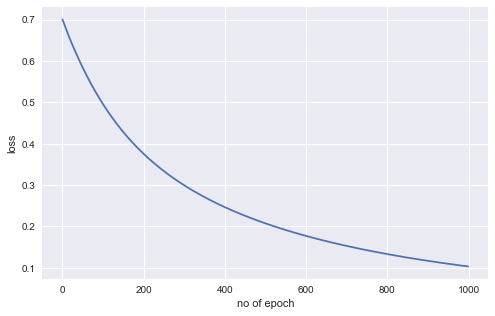

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(model.history.history['loss'])

plt.xlabel('no of epoch')
plt.ylabel('loss')

In [99]:
#To check model trained precisely; don't depend only on low loss value.
#Try to check with original outputs with predicted ones
#To do this we can use simple program like below(for small ones), but precise way is used "confusion_matrix"
for i in zip(outputs, model.predict(inputs)):
    print(i[0], '-->', i[1])

[0] --> [0.00312133]
[0] --> [0.12801233]
[0] --> [0.12438854]
[1] --> [0.86946183]


In [ ]:
#In logistic regression problems to measure accurate of model we can use "confusion_matrix"

In [100]:
#scikit learn is ML library
from sklearn.metrics import confusion_matrix
#seaborn is a high level plotting library based on matplotlib
import seaborn as sns

In [103]:
pred = model.predict(inputs)
pred

array([[0.00312133],
       [0.12801233],
       [0.12438854],
       [0.86946183]], dtype=float32)

In [104]:
#predtion values are not binary/discrete values(these are continuous), but original output values are binary
#But confusion matrix can't handle a mix of binary and continuous targets
#There for have to convert these valuse into binary

#Our logic is; if predicted value is,
#                            >  0.5 --> 1
#                            <= 0.5 --> 0
pred[pred > .5] = 1
pred[pred <= .5] = 0
pred

array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

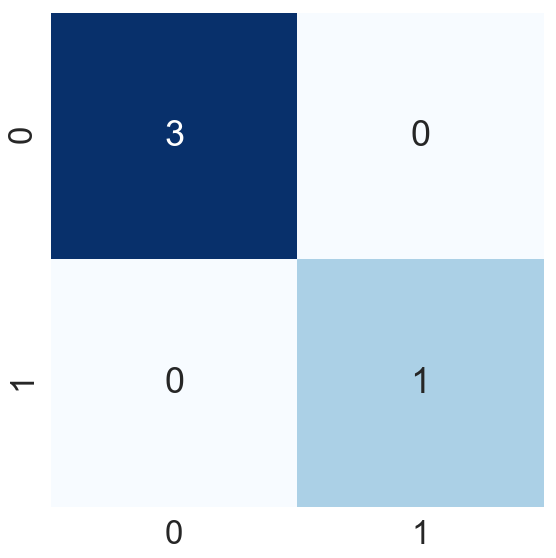

In [105]:
cm = confusion_matrix(outputs, pred)

plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
sns.set(font_scale=3)

sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='d')

In [ ]:
#Apply model

In [108]:
def predict_logical_and(in1, in2):
    #change input format for model required
    x = [[[in1, in2]]]
    
    pred = model.predict(x)
    
    if pred > .5:
        return 1
    else:
        return 0
    

In [109]:
predict_logical_and(1, 1)

1

In [111]:
predict_logical_and(0, 1)

0